In [1]:
import pandas as pd

In [3]:
original = pd.read_csv('original.csv')
original

,Class,edge_purchases,ep,ep2,id,n_purchases,solo_purchases
0,2,66,0.531915,0.974194,67130910,141,75
1,1,523,0.487757,0.930584,67901421,1021,498
2,0,766,0.166485,0.223958,70645722,919,153
3,1,498,0.372796,0.820930,70748454,794,296
4,1,3836,0.273622,0.676743,82008925,5281,1445
...,...,...,...,...,...,...,...
58781,0,1,0.000000,0.000000,82121117,1,0
58782,2,0,1.000000,1.000000,69395571,1,1
58783,0,1,0.000000,0.000000,67207924,1,0
58784,0,1,0.000000,0.000000,82019459,1,0


In [5]:
prices = pd.read_csv('prices.csv', sep=';')
prices

,AV_Id,price
0,80140046,78.145768
1,72748872,1.228232
2,65383360,6.010853
3,80178631,29.858109
4,68542061,2.955884
...,...,...
59278,65981860,30.000000
59279,82143731,2699.000000
59280,73652180,186.000000
59281,80105165,359.000000


In [10]:
df = pd.merge(original, prices, left_on='id', right_on='AV_Id')
df = df[["ep", "ep2", "price"]]
df

,ep,ep2,price
0,0.531915,0.974194,94.514702
1,0.487757,0.930584,21.618004
2,0.166485,0.223958,1.900392
3,0.372796,0.820930,3.501583
4,0.273622,0.676743,9.416193
...,...,...,...
58781,0.000000,0.000000,1.200000
58782,1.000000,1.000000,24.900000
58783,0.000000,0.000000,29.900000
58784,0.000000,0.000000,499.000000


Text(0.5, 0, 'price')

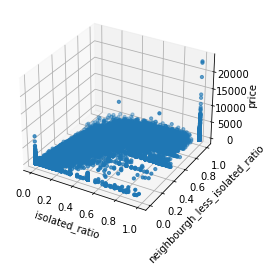

In [12]:
import matplotlib.pyplot as plt

data_to_plot = df.to_numpy()
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(data_to_plot[:, 0], data_to_plot[:, 1], data_to_plot[:, 2], s=10, cmap='viridis')
ax.set_xlabel("isolated_ratio")
ax.set_ylabel("neighbourgh_less_isolated_ratio")
ax.set_zlabel("price")

In [14]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0).fit(df)
results = kmeans.predict(df)

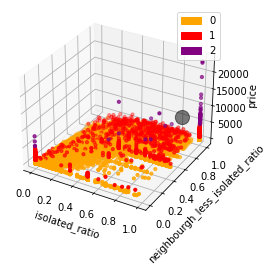

In [22]:
import numpy as np
import matplotlib.patches as mpatches

colormap = np.array(['orange', 'red', 'purple'])

data_to_plot = df.to_numpy()
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(data_to_plot[:, 0], data_to_plot[:, 1], data_to_plot[:, 2], c=colormap[results], s=10, cmap='viridis')
centers = kmeans.cluster_centers_
ax.scatter3D(centers[:, 0], centers[:, 1], centers[:, 2], c='black', s=200, alpha=0.5)
cluster_1 = mpatches.Patch(color='orange', label="0")
cluster_2 = mpatches.Patch(color='red', label="1")
cluster_3 = mpatches.Patch(color='purple', label="2")
plt.legend(handles=[cluster_1, cluster_2, cluster_3])
ax.set_xlabel("isolated_ratio")
ax.set_ylabel("neighbourgh_less_isolated_ratio")
ax.set_zlabel("price")

plt.show()

In [23]:
df = pd.merge(original, prices, left_on='id', right_on='AV_Id')
df = df[["ep", "ep2"]]
df

,ep,ep2
0,0.531915,0.974194
1,0.487757,0.930584
2,0.166485,0.223958
3,0.372796,0.820930
4,0.273622,0.676743
...,...,...
58781,0.000000,0.000000
58782,1.000000,1.000000
58783,0.000000,0.000000
58784,0.000000,0.000000


Text(0, 0.5, 'neighbourgh_less_isolated_ratio')

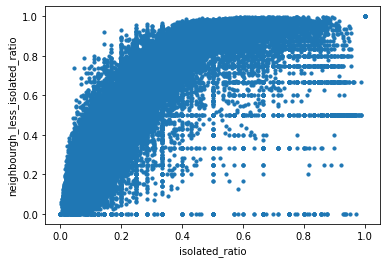

In [26]:
import matplotlib.pyplot as plt

data_to_plot = df.to_numpy()
fig = plt.figure()
ax = plt.axes()
ax.scatter(data_to_plot[:, 0], data_to_plot[:, 1], s=10, cmap='viridis')
ax.set_xlabel("isolated_ratio")
ax.set_ylabel("neighbourgh_less_isolated_ratio")

In [34]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0).fit(df)
results = kmeans.predict(df)

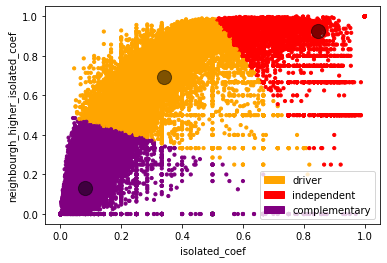

In [39]:
import numpy as np
import matplotlib.patches as mpatches

colormap = np.array(['orange', 'red', 'purple'])

data_to_plot = df.to_numpy()
fig = plt.figure()
ax = plt.axes()
ax.scatter(data_to_plot[:, 0], data_to_plot[:, 1], c=colormap[results], s=10, cmap='viridis')
centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
cluster_1 = mpatches.Patch(color='orange', label="driver")
cluster_2 = mpatches.Patch(color='red', label="independent")
cluster_3 = mpatches.Patch(color='purple', label="complementary")
plt.legend(handles=[cluster_1, cluster_2, cluster_3])
ax.set_xlabel("isolated_coef")
ax.set_ylabel("neighbourgh_higher_isolated_coef")

plt.show()